# Prediciting Insurance Charges

Please see the read me file which contains more of a description about what we are trying to solve here for this quick project. 

We will approach the project with the following steps: 

1. Exploratory Data Analysis
2. Feature Engineering 
3. Feature Selection 
4. Modelling 
5. Project Outcome

# Load Packages and Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# load the data 
df = pd.read_csv('data/insurance.csv')

# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


Some key points: 
- 7 actual columns, 1 is an index so we can drop it 
- sex, smoker and region are categorical so we will need to feature encode later on 
- The rest of the columns are numerical, we will look at their distribution later - if they are skewed we will need to apply a transformation 
- There are 1338 rows in our data

In [4]:
#view the data first 
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,index,age,sex,bmi,children,smoker,region,charges
1333,1333,50,male,30.97,3,no,northwest,10600.5483
1334,1334,18,female,31.92,0,no,northeast,2205.9808
1335,1335,18,female,36.85,0,no,southeast,1629.8335
1336,1336,21,female,25.80,0,no,southwest,2007.9450
1337,1337,61,female,29.07,0,yes,northwest,29141.3603


## Statistical Summaries 

This will help us in getting the 5 number summary of the numerical columns, helping us get a quick understanding of how some of the data is distributed

In [7]:
df.describe()

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


Charges seems to exhibit that their might be some outliers, given that the max value is very far from the 75% percentile, this is also the same for BMI, a BMi very far at 53 may be a cause for concern as that is extremely unhealthy! 

### Univariate Analysis 

Here we do some exploratory data analysis looking at singular columns only, this will help us better understand the data we have as a whole

<AxesSubplot: >

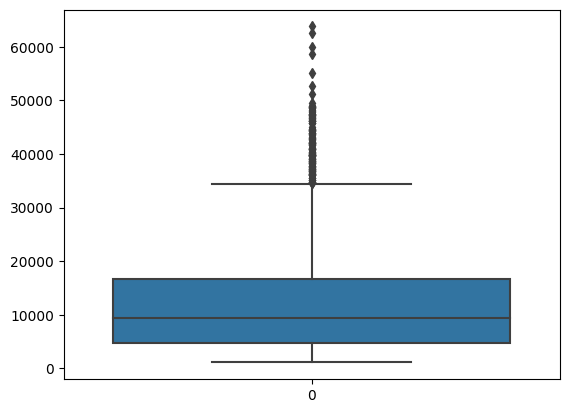

In [9]:
# check the distribution of the target variable first 
sns.boxplot(df['charges'])

<AxesSubplot: xlabel='sex', ylabel='charges'>

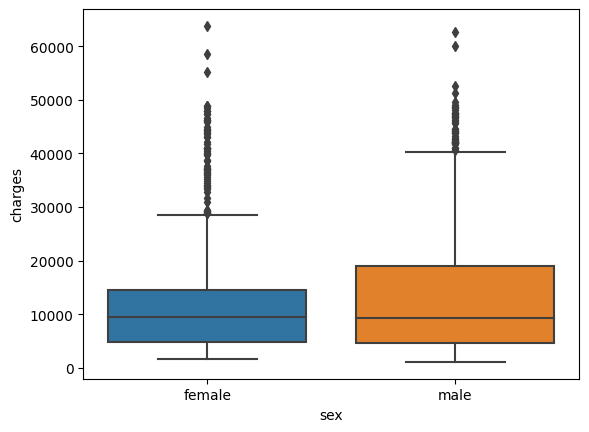

In [11]:
sns.boxplot(df, x = "sex", y = "charges")